# <center> • **Computer Vision** </center>
#### <center> _____________○ Assignment 01: Perspective Projection_____________ </center>
#### <center> _____________○ Name: Belal Khaled ~ 2136873_____________ </center>
# ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • Importing All Libraries We Need:

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math

# ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

##### • **Defining The XYZ-Coordinates And Homogeneous coordinate (W), Human Pose Parts, And Camera Parameters:**

In [23]:
# (X, Y and Z) Coordinates And Homogeneous coordinate (W):
points = np.array([
                [0 ,6.5 ,6.5 ,6.5 ,6.5 ,0 ,0 ,0 ,5 ,0 ,5], # ==> X-coordinates
                [0 ,2.5 ,2.5 ,-2.5 ,-2.5 ,0 ,0 ,2.5 ,2.5 ,-2.5 ,-2.5], # ==> Y-coordinates
                [0 ,-2.5 ,-7.5 ,-2.5 ,-7.5 ,10 ,12.5 ,5 ,5 ,5 ,5], # ==> Z-coordinates
                [1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ] # ==> Homogeneous coordinate (w)
])

# Human Pose Parts:
larm_idx = [0 ,5 ,7 ,8]
rarm_idx = [0 ,5 ,9 ,10]
lleg_idx = [0 ,1 ,2 ,2]
rleg_idx = [0 ,3 ,4 ,4]
torso_idx = [0 ,5]
head_idx = [5, 6 ,6 ,6]

# Camera Parameters:
camera_position = np.array([25, 0, 0])
angles = np.arange(0, 360, 45)

# ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • Plotting The Human Pose:

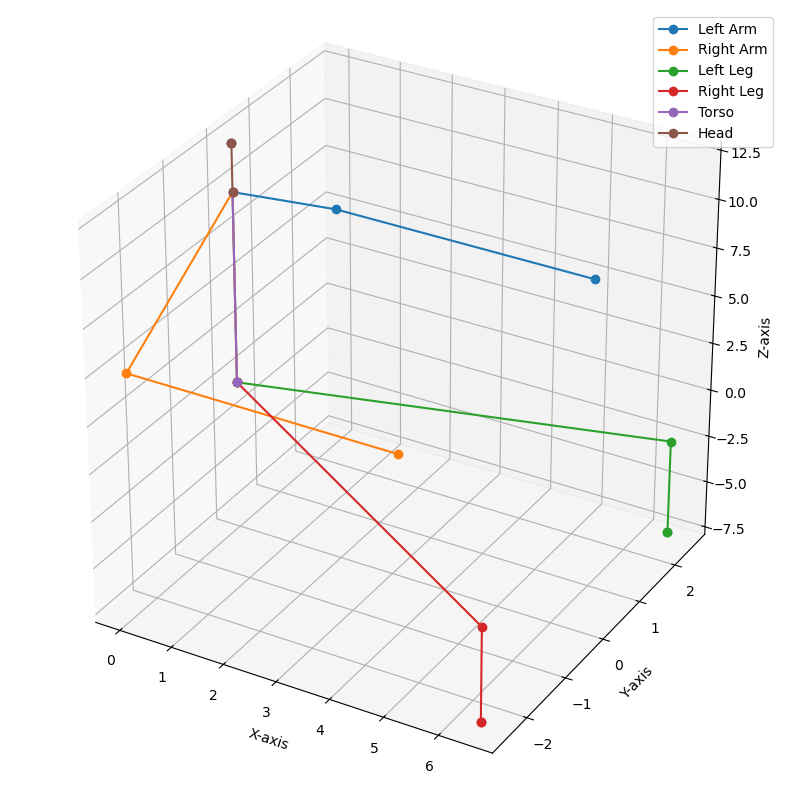

In [24]:
#Test:
plt.figure(figsize = (15,10))
ax = plt.subplot(111 ,projection = "3d")

ax.plot(points[0, larm_idx], points[1, larm_idx], points[2, larm_idx], 'o-', label="Left Arm")
ax.plot(points[0, rarm_idx], points[1, rarm_idx], points[2, rarm_idx], 'o-', label="Right Arm")
ax.plot(points[0, lleg_idx], points[1, lleg_idx], points[2, lleg_idx], 'o-', label="Left Leg")
ax.plot(points[0, rleg_idx], points[1, rleg_idx], points[2, rleg_idx], 'o-', label="Right Leg")
ax.plot(points[0, torso_idx], points[1, torso_idx], points[2, torso_idx], 'o-', label="Torso")
ax.plot(points[0, head_idx], points[1, head_idx], points[2, head_idx], 'o-', label="Head")

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_box_aspect([1,1,1]) # aspect ratio is 1:1:1
ax.legend()

# ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • Compute The Camera's Local Coordinate System:

In [25]:
uz = -camera_position / np.linalg.norm(camera_position)
print('UZ IS:', uz)

ux = np.cross( np.array([0, 0, 1]), uz)
ux = ux / np.linalg.norm(ux)
print('UX IS:', ux)

uy = np.cross(uz, ux)
print('UY IS:', uy)

UZ IS: [-1.  0.  0.]
UX IS: [ 0. -1.  0.]
UY IS: [0. 0. 1.]


# ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • World To Camera Coordinate Transformation Matrix:

In [26]:
extrinsic_matrix = np.column_stack((ux ,uy ,uz ,camera_position))
extrinsic_matrix = np.row_stack((extrinsic_matrix ,(0,0,0,1)))
print('Extrinsic Matrix Is:')
print(extrinsic_matrix)

Extrinsic Matrix Is:
[[ 0.  0. -1. 25.]
 [-1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]]


# ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • Camera To Pixel Coordinate Transformation Matrix:

In [27]:
Alpha = 400
Beta = 400
cx = 200
cy = 200
intrinsic_matrix = np.array([
              [Alpha, 0   , cx],
              [0    , Beta, cy],
              [0    , 0   , 1]
])
print('Intrinsic Matrix Is:')
print(intrinsic_matrix)

Intrinsic Matrix Is:
[[400   0 200]
 [  0 400 200]
 [  0   0   1]]


# ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • For Loop To Perform Projections At Each Camera Angle:

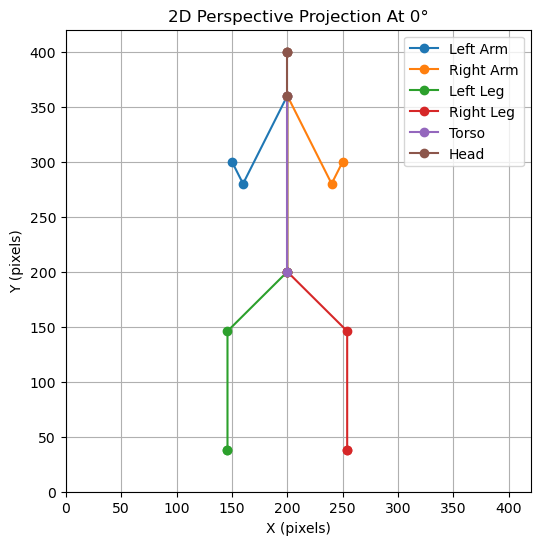

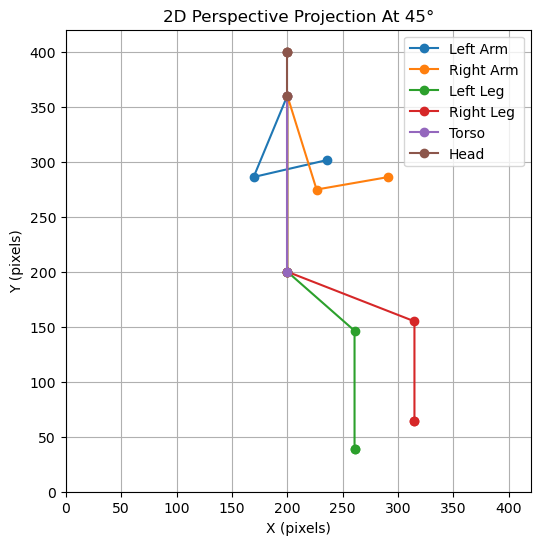

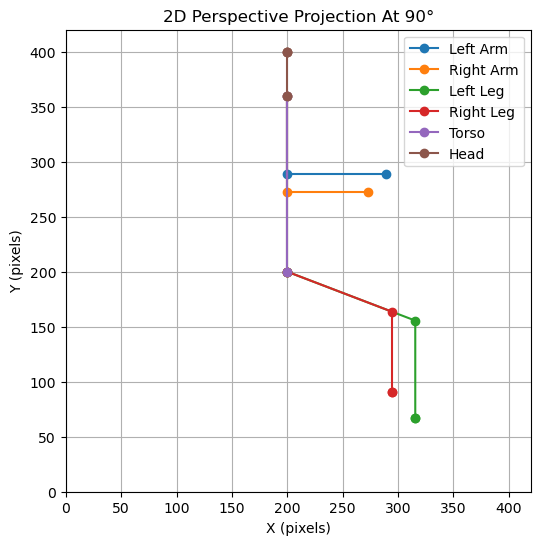

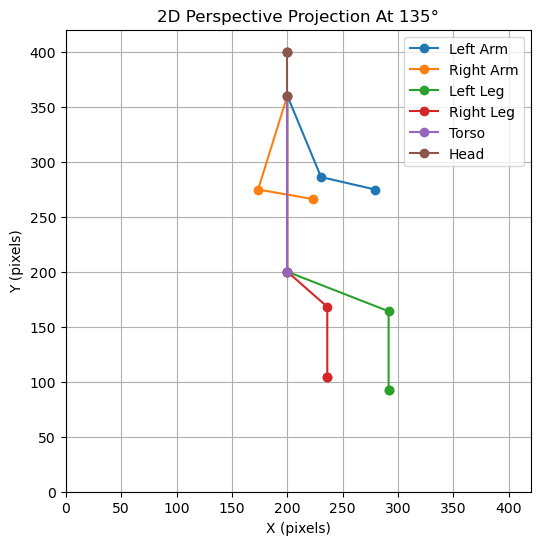

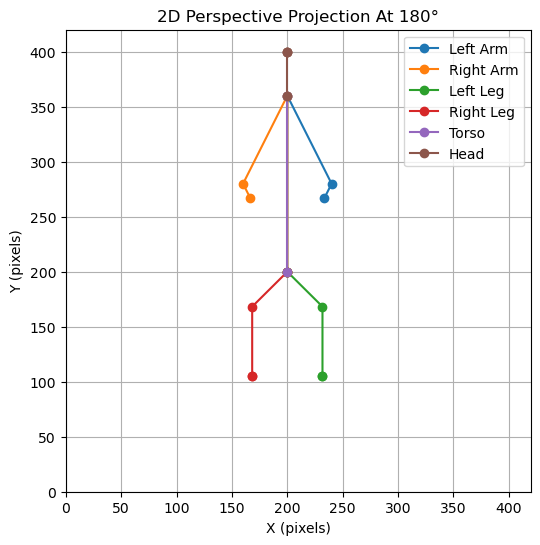

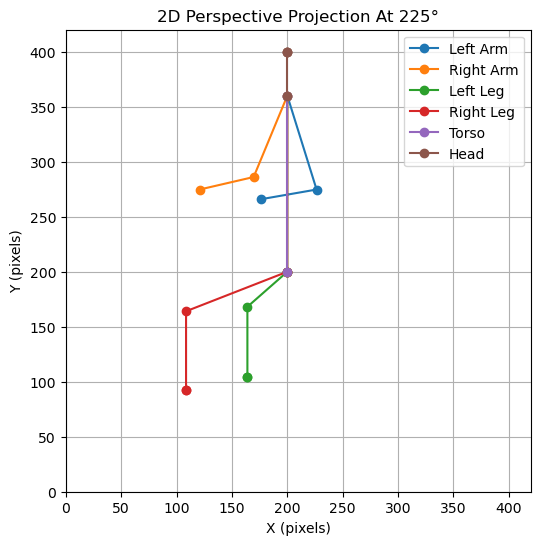

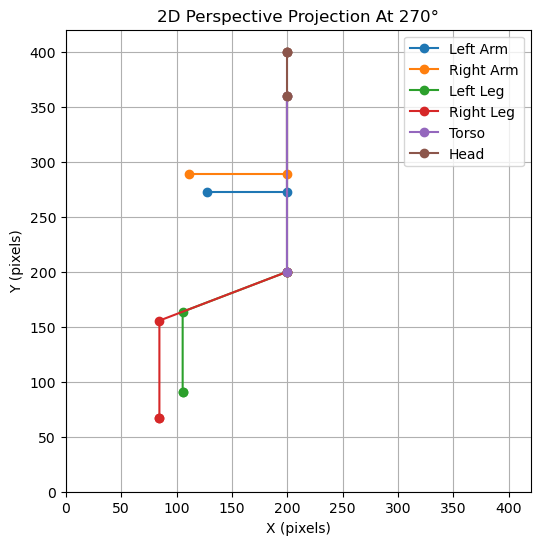

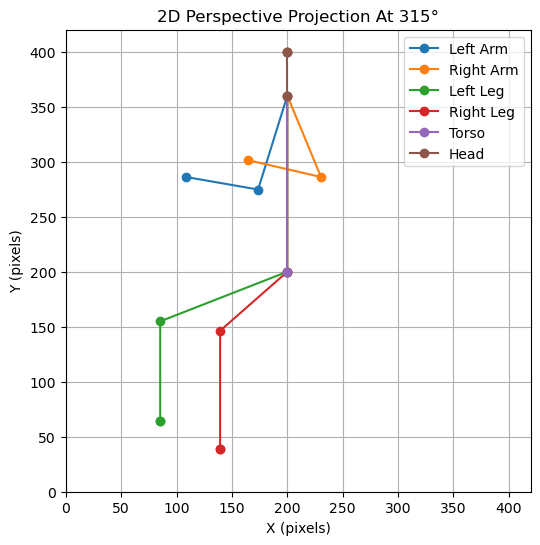

In [28]:
for angle in angles:
    theta = np.radians(angle)
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],    # Rz
        [0, 0, 1]
    ])
    rotated_camera_position = rotation_matrix @ camera_position
    uz = -rotated_camera_position / np.linalg.norm(rotated_camera_position)
    ux = np.cross(np.array([0, 0, 1]), uz)
    ux = ux / np.linalg.norm(ux)
    uy = np.cross(uz, ux)

    # Update Extrinsic Matrix For Rotated Camera:
    extrinsic_matrix = np.column_stack((ux, uy, uz, rotated_camera_position))
    extrinsic_matrix = np.row_stack((extrinsic_matrix, (0, 0, 0, 1)))
    extrinsic_matrix = np.linalg.inv(extrinsic_matrix)
    Mext = extrinsic_matrix[:3, :]

    # Projection:
    proj = intrinsic_matrix @ Mext @ points
    proj[0, :] /= proj[2, :]
    proj[1, :] /= proj[2, :]
    proj[2, :] /= proj[2, :]

    # Plot The Projected 2D Image:
    plt.figure(figsize=(6, 6))
    plt.plot(proj[0, larm_idx], proj[1, larm_idx], 'o-', label="Left Arm")
    plt.plot(proj[0, rarm_idx], proj[1, rarm_idx], 'o-', label="Right Arm")
    plt.plot(proj[0, lleg_idx], proj[1, lleg_idx], 'o-', label="Left Leg")
    plt.plot(proj[0, rleg_idx], proj[1, rleg_idx], 'o-', label="Right Leg")
    plt.plot(proj[0, torso_idx], proj[1, torso_idx], 'o-', label="Torso")
    plt.plot(proj[0, head_idx], proj[1, head_idx], 'o-', label="Head")

    plt.title(f"2D Perspective Projection At {angle}°")
    plt.xlabel("X (pixels)")
    plt.ylabel("Y (pixels)")
    plt.xlim(0, 420)
    plt.ylim(0, 420)
    plt.legend()
    plt.grid()
    plt.show()

# ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# <center> **The End** </center> 

# ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ